Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

Load Data

In [2]:
xiaomi = pd.read_csv('../Dataset/Xiaomi_clean.csv', parse_dates=['Date'])
samsung = pd.read_csv('../Dataset/Samsung_clean.csv', parse_dates=['Date'])
apple = pd.read_csv('../Dataset/Apple_clean.csv', parse_dates=['Date'])

for df in [xiaomi, samsung, apple]:
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)

Closing Price Correlation Matrix

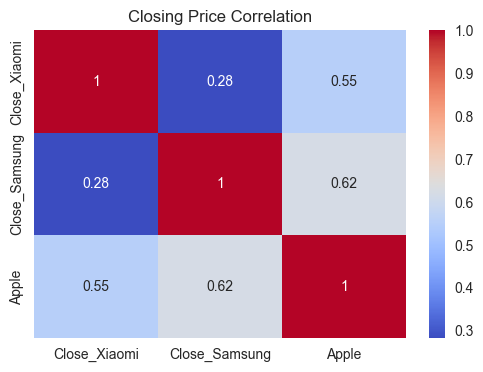

In [ ]:
merged = (
    xiaomi[['Date', 'Close']]
    .merge(samsung[['Date', 'Close']], on='Date', suffixes=('_Xiaomi', '_Samsung'))
    .merge(apple[['Date', 'Close']], on='Date')
    .rename(columns={'Close': 'Close_Apple'})
)

plt.figure(figsize=(6,4))
sns.heatmap(merged[['Close_Xiaomi', 'Close_Samsung', 'Close_Apple']].corr(), annot=True, cmap='coolwarm')
plt.title("Closing Price Correlation")
plt.show()


Normalize and Compare Growth 

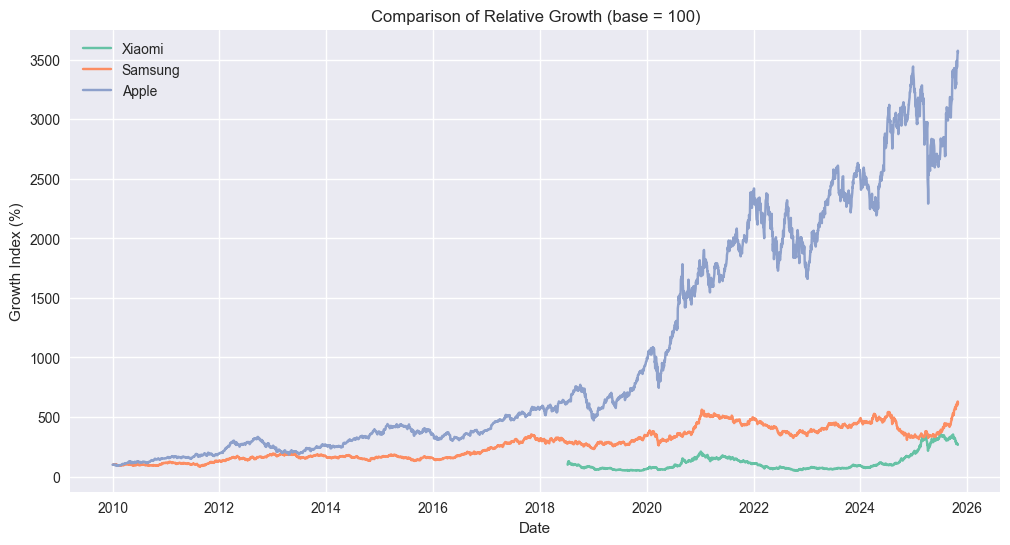

In [4]:
plt.figure(figsize=(12,6))
for df, label in zip([xiaomi, samsung, apple], ['Xiaomi', 'Samsung', 'Apple']):
    base = df['Close'].iloc[0]
    plt.plot(df['Date'], (df['Close'] / base) * 100, label=label)

plt.title("Comparison of Relative Growth (base = 100)")
plt.ylabel("Growth Index (%)")
plt.xlabel("Date")
plt.legend()
plt.show()
